## 📑 `Comparing Confused, false negative and false positive instances`

### 🔁 Prerequisites:
1. **Generate datasets first**  
   ```bash
   python main.py aidovecl
   ```
   <br>

2. **Train YOLO on real and augmented datasets**  
   ```bash
   python main.py train_yolo
   ```
   <br>

In [ ]:
from src import yolo

!rm -r $PWD/runs/detect/test*
results = yolo.test_all(write_to_csv=False)  # We just need the results variable in this notebook, not the csv


In [ ]:
from src import mismatch
%matplotlib inline

mismatch.export_samples(
    results_dict=results,          # Mapping: case_name -> Ultralytics validation result objects
    datasets_root="datasets",      # Root folder containing datasets/<domain>/test/{images,annotations.json}
    iou_thr=0.45,                  # IoU threshold (same default as Ultralytics confusion-matrix logic)
    score_thr=0.25,                # Confidence cutoff (same as .val confidence used in test results)
    per_case_k=1000,               # Max number of images to render per case
    prefer_diverse_confusions=True,# Prefer class-balanced sampling for confusion examples
    prefer_diverse_fns_fps=True,   # Prefer class-balanced sampling for false negatives/positives
    pred_to_gt_id_offset=None      # Auto-fix 0/1-based category IDs if needed (override with int if desired)
)

In [ ]:
comp = mismatch.MismatchComparison(
    tile_w=256,                 # width (in pixels) to resize each tile before building the grid
    gap=5,                      # horizontal/vertical spacing (in pixels) between tiles
    pad_color=(255, 255, 255),  # background color used for padding (RGB tuple)
    fontsize=10,                # font size for row/column labels and subplot titles
    pad_frac=0.012,             # fraction of figure width used as horizontal padding for row/col labels
    row_pad_frac=0.002,         # additional vertical offset (fraction of figure height) for row numbers
)

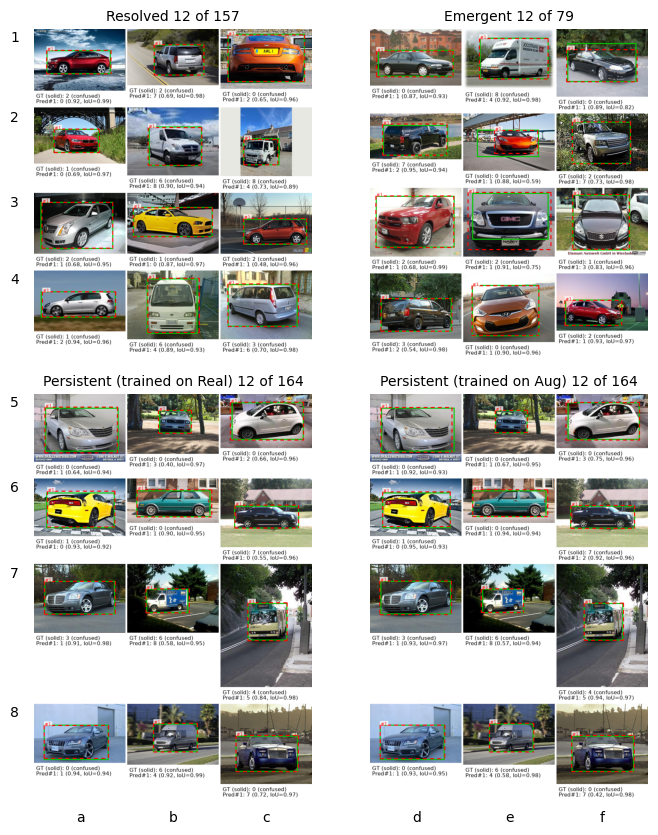

In [23]:
# Comparing Confused Instances
comp.show_mismatch_comparison(
    A_dir='runs/detect/test_YOLO_real_mixup_0.00_mosaic_0.00_on_real/mismatches/confusions',
    B_dir='runs/detect/test_YOLO_augmented_mixup_0.00_mosaic_0.00_on_real/mismatches/confusions',
    m=4,
    n=3,
    seed=0,
    output_dir="./figs/fig7-9",
    output_name="confusion_samples.pdf",
    figsize=(13, 10),
    space=(-0.5, -0.1),
)

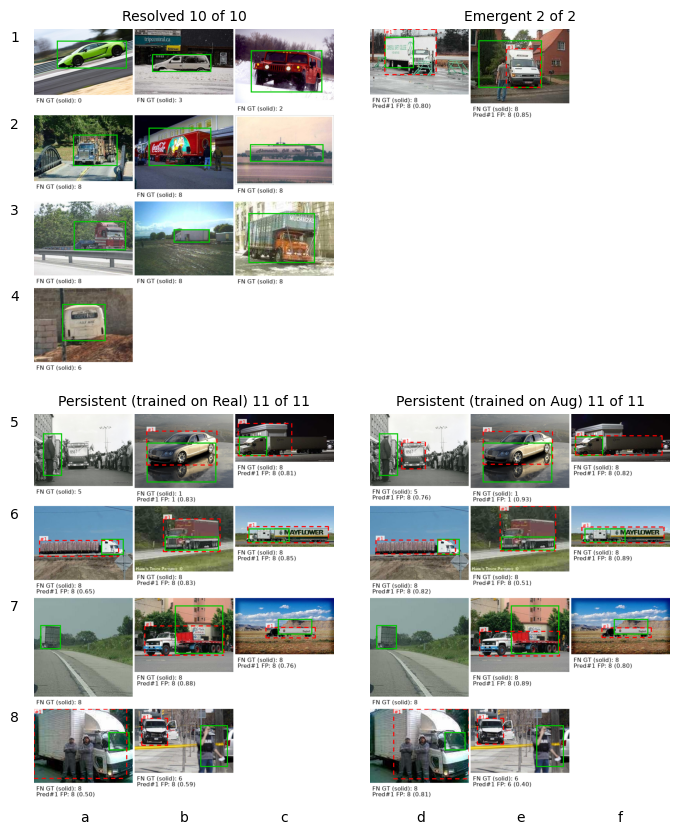

In [24]:
# Comparing False Negatives
comp.show_mismatch_comparison(
    A_dir='runs/detect/test_YOLO_real_mixup_0.00_mosaic_0.00_on_real/mismatches/false_negatives',
    B_dir='runs/detect/test_YOLO_augmented_mixup_0.00_mosaic_0.00_on_real/mismatches/false_negatives',
    m=4,
    n=3,
    seed=0,
    output_dir="./figs/fig7-9",
    output_name="fn_samples.pdf",
    figsize=(13, 10),
    space=(-0.5,-0.0),
)

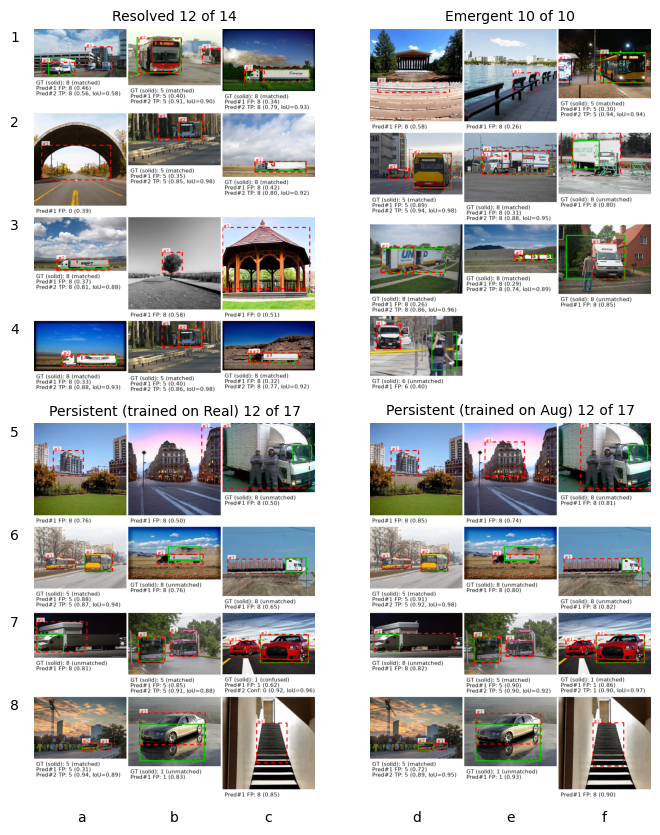

In [25]:
# Comparing False Positives
comp.show_mismatch_comparison(
    A_dir='runs/detect/test_YOLO_real_mixup_0.00_mosaic_0.00_on_real/mismatches/false_positives',
    B_dir='runs/detect/test_YOLO_augmented_mixup_0.00_mosaic_0.00_on_real/mismatches/false_positives',
    m=4,
    n=3,
    seed=0,
    output_dir="./figs/fig7-9",
    output_name="fp_samples.pdf",
    figsize=(13, 10),
    space=(-0.5,0.05),
)

In [26]:
# Initialize the plotter with your preferred font sizes (same as your rcParams block)
plotter = mismatch.ConfusionGridPlotter(
    font_size=16,         # Default font size
    axes_title_size=20,   # Axes title font size
    axes_label_size=18,   # X and Y axis label font size
    xtick_size=14,        # X axis tick labels
    ytick_size=14,        # Y axis tick labels
    legend_size=18        # Legend font size
)

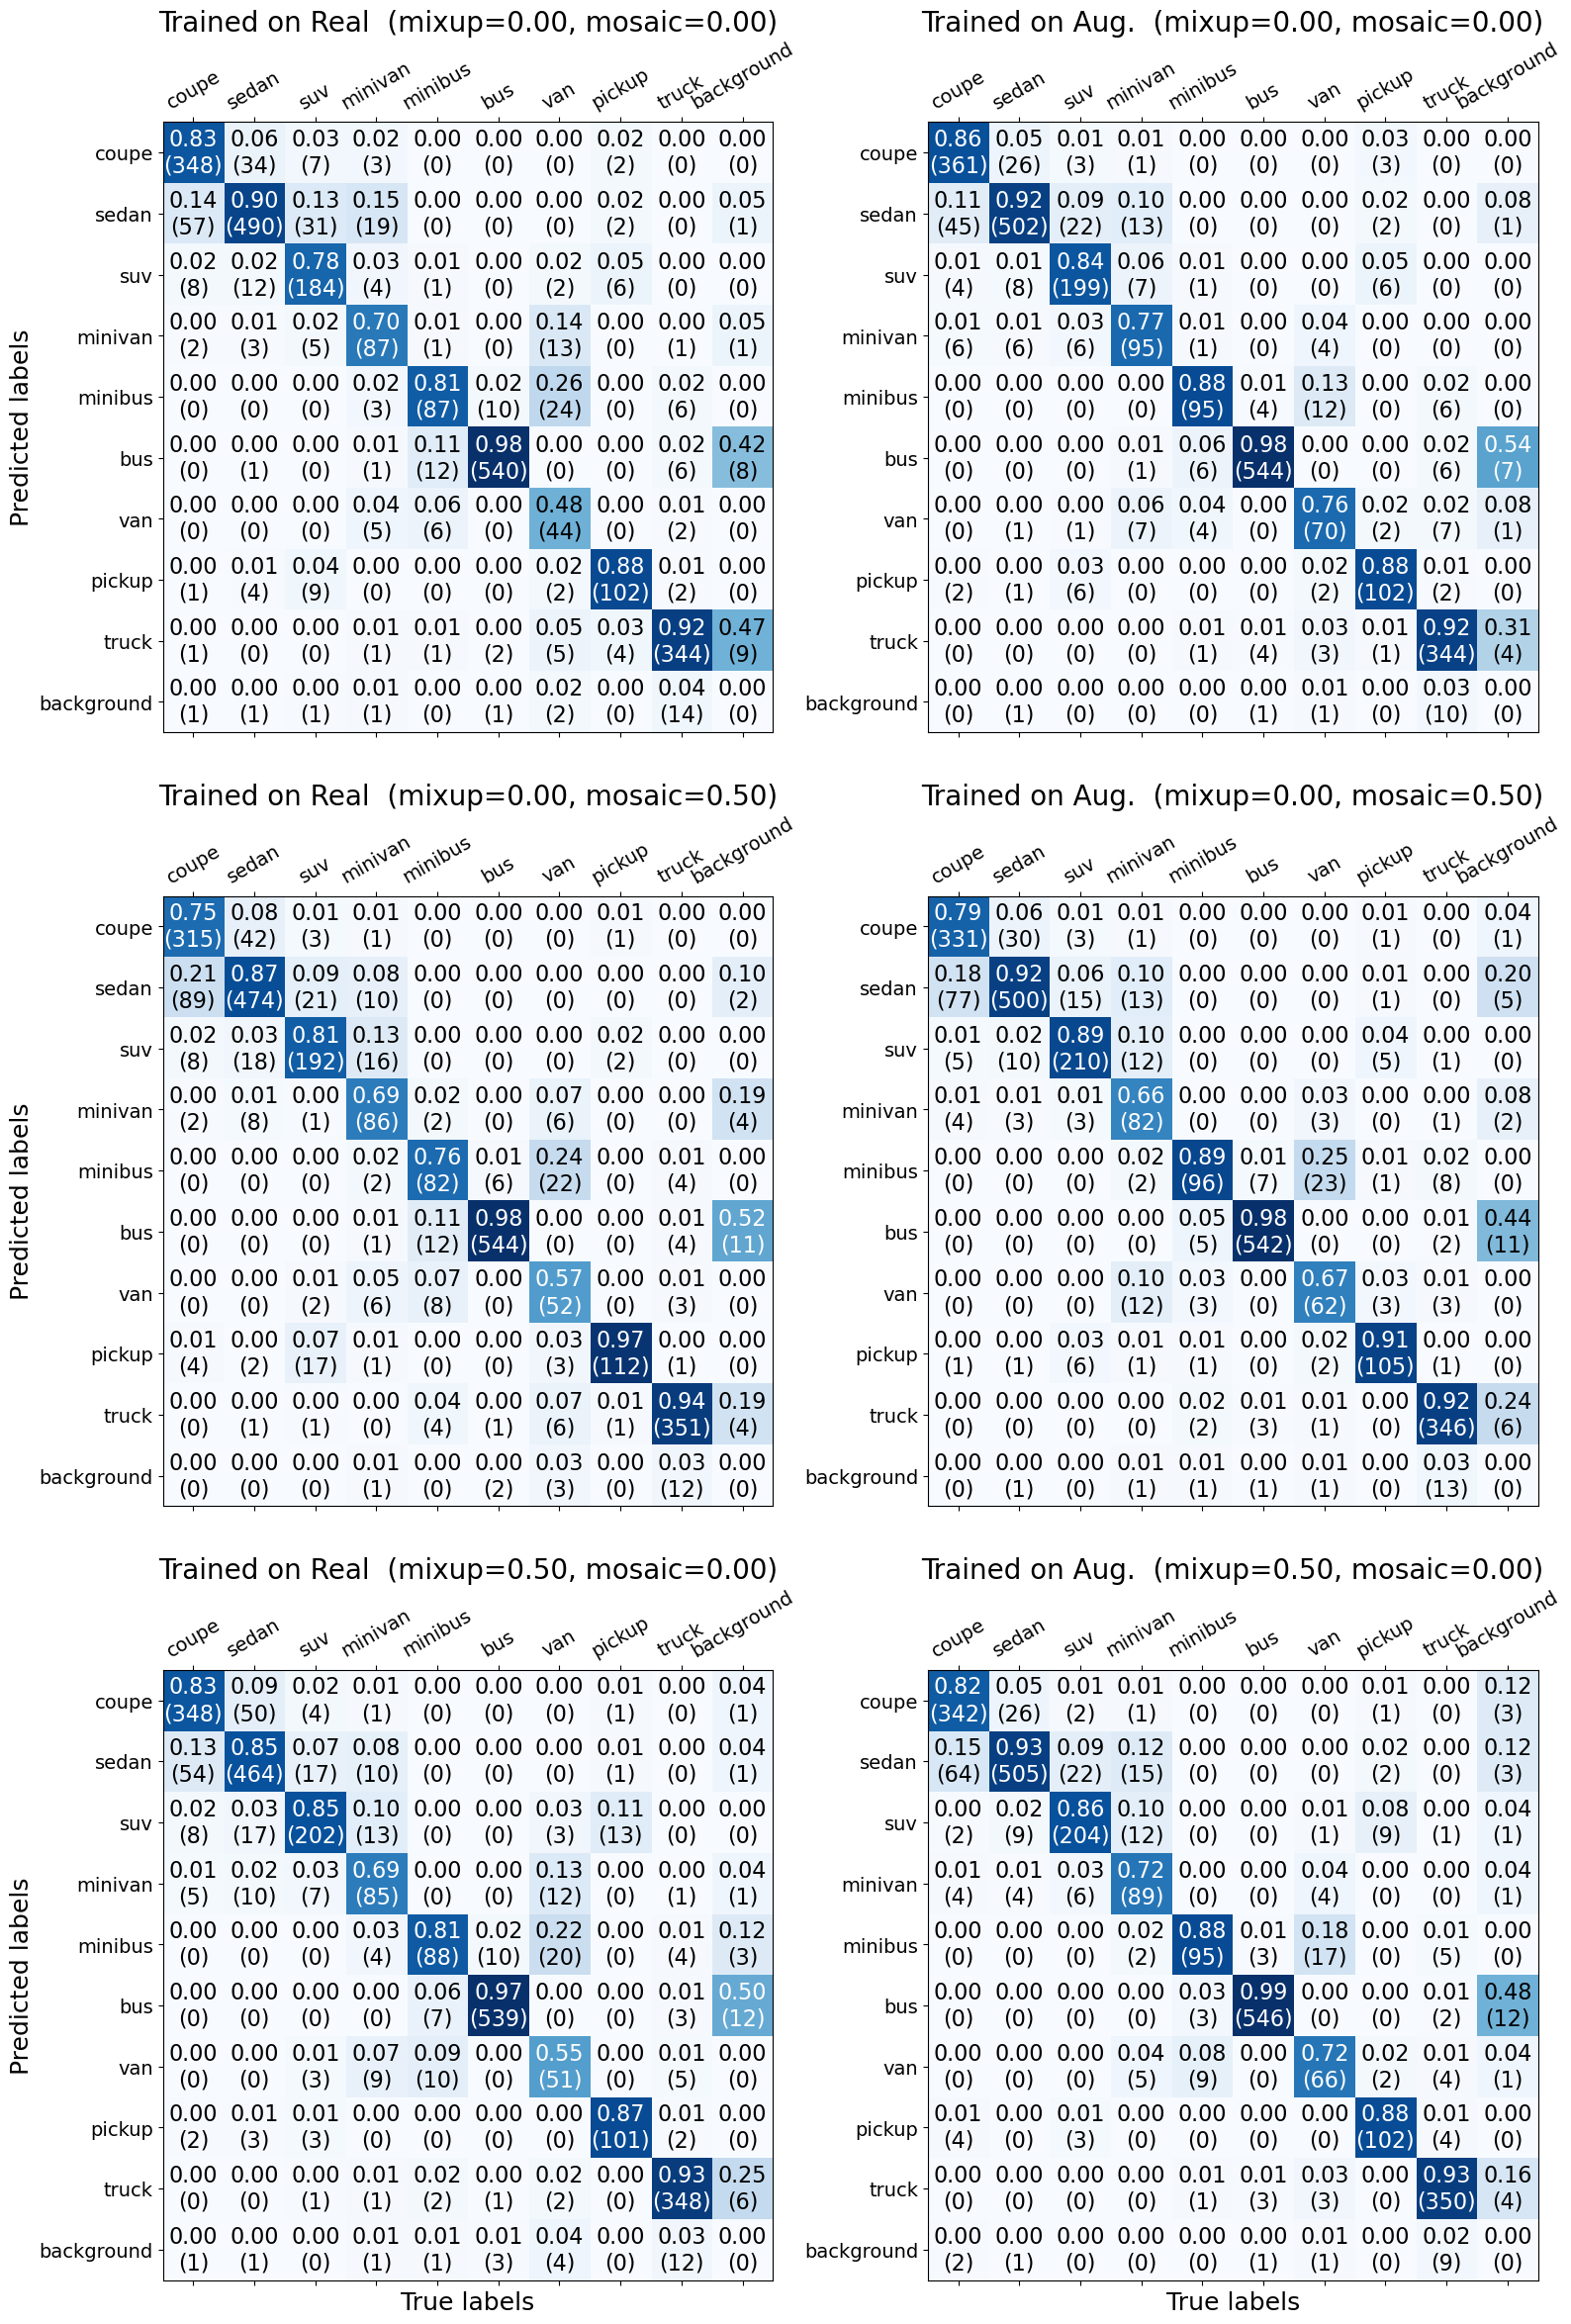

In [27]:
# Build and save the grid (3x2), filtering keys that end with "_real"
fig = plotter.plot_all(
    results=results,
    nrows=3,
    ncols=2,
    figsize=(16, 24),
    filter_suffix="real",
    normalize=True,
    show_numbers=True,
    save_path="./figs/fig5-6/ablation_confmat_test_on_real.pdf"
)


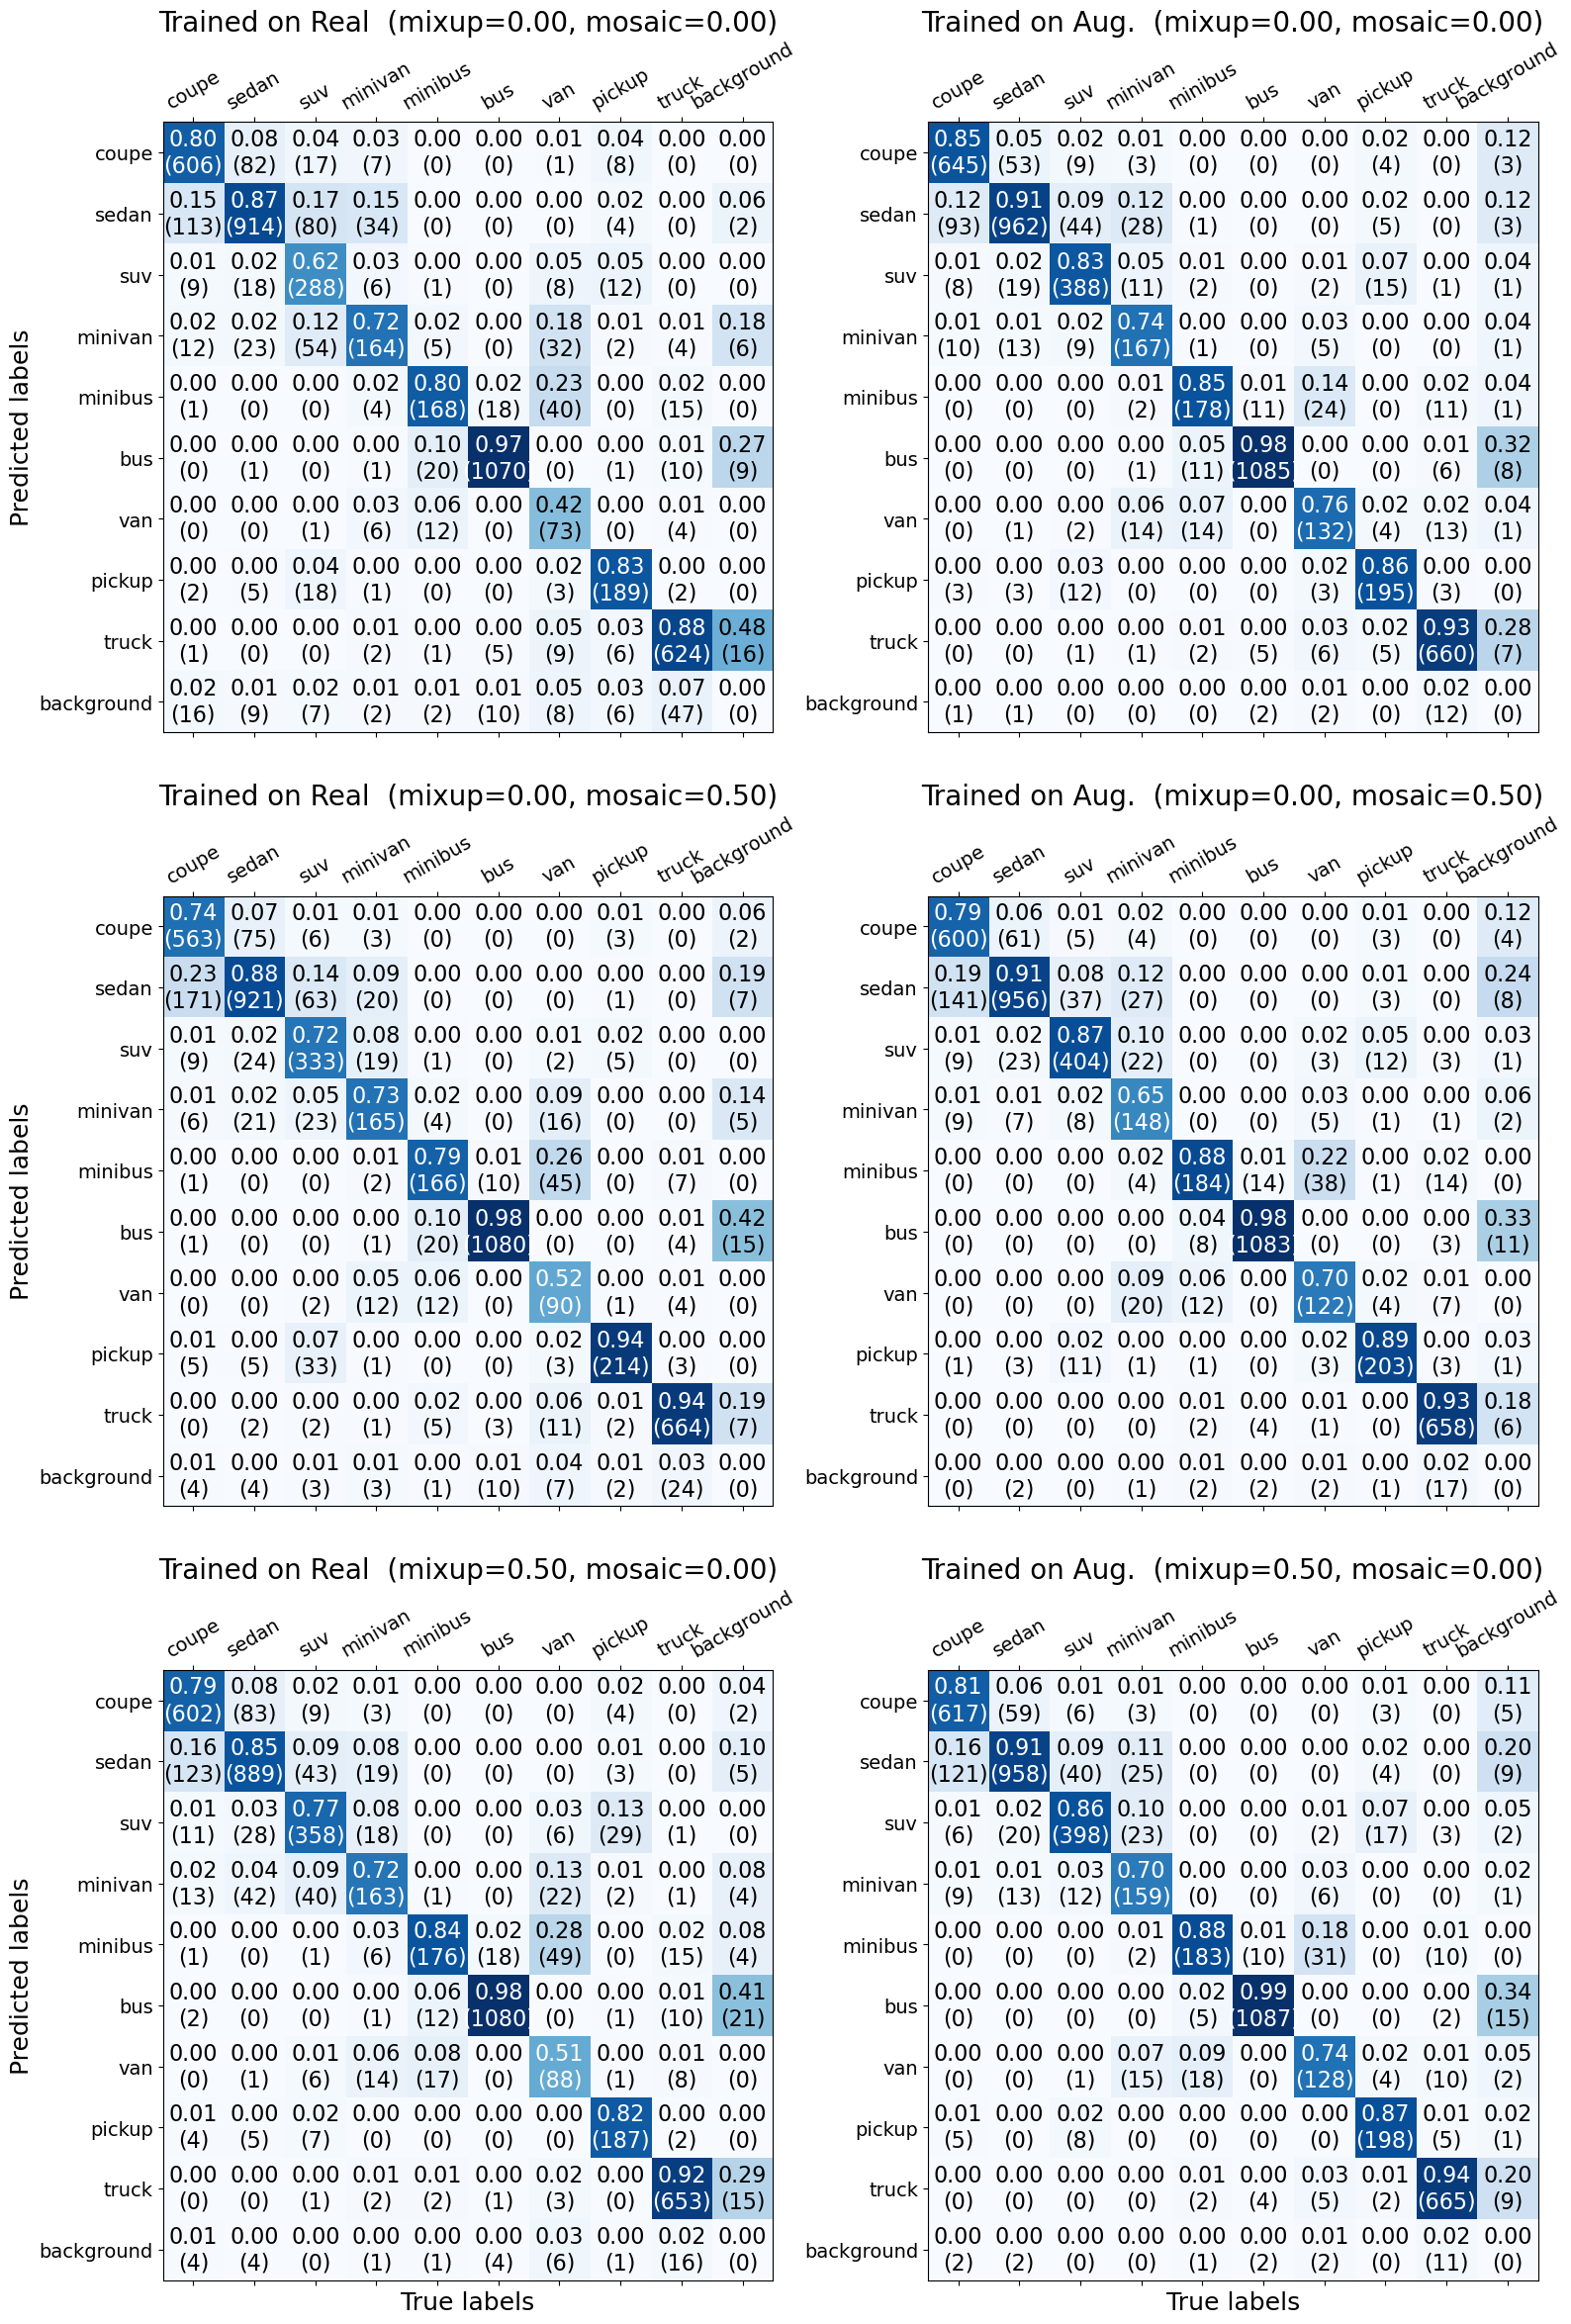

In [28]:
# Build and save the grid (3x2), filtering keys that end with "_augmented"
fig = plotter.plot_all(
    results=results,
    nrows=3,
    ncols=2,
    figsize=(16, 24),
    filter_suffix="augmented",
    normalize=True,
    show_numbers=True,
    save_path="./figs/fig5-6/ablation_confmat_test_on_aug.pdf"
)